In [3]:
# hongong.hanbit.co.kr

In [4]:
# 회귀분석
# supervised learning(지도학습) : 연속값을 예측값을 예측하는 모델

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

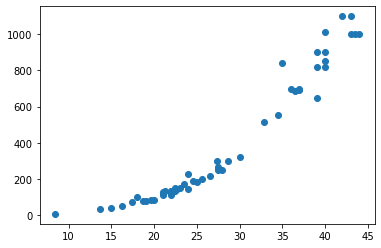

In [7]:
plt.scatter(perch_length, perch_weight)

In [8]:
# perch_length(x) => perch_weight(y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=111)

In [11]:
x_train

array([25. , 27.3, 27.5, 26.5, 40. , 40. , 37. , 20. , 43.5, 16.2, 17.4,
       42. , 21. , 40. , 21.3, 18.7, 39. , 34.5, 18. , 32.8, 37. , 19.6,
       22.7, 28. , 22. , 25.6, 24. , 13.7, 21. , 21. , 39. , 19. , 36.5,
       22. , 15. , 36. , 22.5, 23. , 43. , 44. , 39. , 22.5])

In [12]:
y_train

array([ 180. ,  300. ,  265. ,  218. , 1015. ,  820. ,  700. ,   85. ,
       1000. ,   51.5,   70. , 1100. ,  115. ,  850. ,  130. ,   78. ,
        820. ,  556. ,  100. ,  514. ,  690. ,   85. ,  145. ,  250. ,
        120. ,  197. ,  225. ,   32. ,  110. ,  125. ,  650. ,   80. ,
        685. ,  110. ,   40. ,  700. ,  130. ,  150. , 1100. , 1000. ,
        900. ,  150. ])

In [13]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knn = KNeighborsRegressor()

In [16]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [17]:
knn.score(x_test, y_test)

0.969149797372039

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_test, knn.predict(x_test))

2978.9742857142846

In [20]:
knn.score(x_train, y_train)

0.9760758322995492

In [21]:
x = np.arange(5, 45)
preds = knn.predict(x.reshape(-1,1))
preds

array([  58.7,   58.7,   58.7,   58.7,   58.7,   58.7,   58.7,   58.7,
         58.7,   58.7,   58.7,   58.7,   75.9,   82.6,   85.6,  104. ,
        120. ,  128. ,  137. ,  166. ,  194. ,  232. ,  246. ,  246. ,
        246. ,  309.4,  377. ,  457. ,  631. ,  631. ,  666.2,  666.2,
        719. ,  752. ,  841. ,  831. ,  921. , 1007. , 1004. , 1004. ])

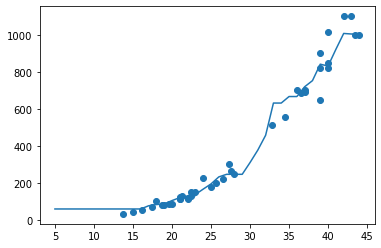

In [22]:
plt.scatter(x_train, y_train)  # 실제 train data
plt.plot(x, preds)  # 가상의 데이터에 대한 모델의 예측값

In [23]:
knn.predict([[60]])

array([1004.])

In [24]:
knn.predict([[30]])

array([309.4])

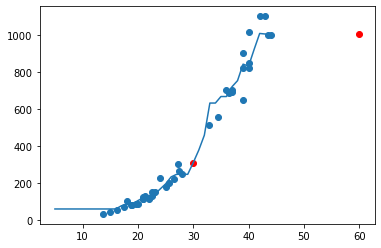

In [25]:
plt.scatter(x_train, y_train)   # 실제 train data
plt.scatter(60, 1004, c='red')
plt.scatter(30, 309, c='red')
plt.plot(x, preds)

In [26]:
distances, indexes = knn.kneighbors([[60]])
indexes

array([[39,  8, 38, 11,  5]], dtype=int64)

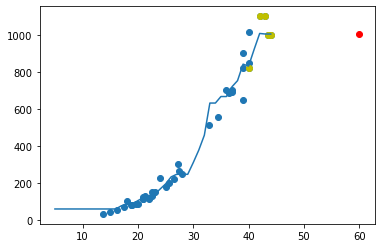

In [27]:
plt.scatter(x_train, y_train)   # 실제 train data
plt.scatter(60, 1004, c='red')
plt.scatter(x_train[indexes], y_train[indexes], c='y')
plt.plot(x, preds)

In [28]:
# KNeighborsRegressor는 test data가 train data의 범주 내에 있으면 잘 예측을 하지만
# test data가 train data의 범주를 벗어나면 정확한 예측을 하지 못한다..
# 따라서 test data가 train data의 범주 내에 있는 경우에만 KNeighborsRegressor를 사용할 수 있다...

In [29]:
# 선형회귀 분석

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
lr.score(x_test.reshape(-1, 1), y_test)

0.8169363895338927

In [34]:
lr.predict([[60]])  # train data의 범주에서 벗어난 test에 대해서 잘 예측..

array([1592.68502584])

In [35]:
lr.coef_

array([37.60759698])

In [36]:
lr.intercept_

-663.7707929866687

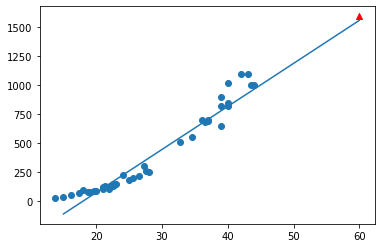

In [37]:
plt.scatter(x_train, y_train)
plt.plot([15, 60], [-663 + 15*37, -663 + 60*37])
plt.scatter([60], lr.predict([[60]]), c='red', marker='^')

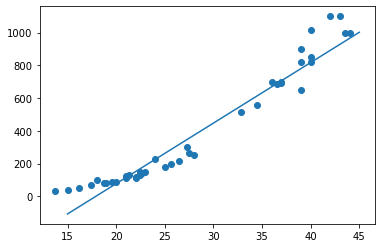

In [38]:
plt.scatter(x_train, y_train)
plt.plot([15, 45], [-663 + 15*37, -663 + 45*37])

In [39]:
# 다중회귀

In [40]:
# x -> y  => y = wx + b (단순회귀모델)
# x, x**2 -> y  =>  y = w1*x1 + w2*x2 +b (다중회귀모델)

In [41]:
train_poly = np.column_stack((x_train**2, x_train))
test_poly = np.column_stack((x_test**2, x_test))

In [42]:
test_poly

array([[  70.56,    8.4 ],
       [ 484.  ,   22.  ],
       [ 484.  ,   22.  ],
       [1600.  ,   40.  ],
       [ 484.  ,   22.  ],
       [1225.  ,   35.  ],
       [ 900.  ,   30.  ],
       [ 552.25,   23.5 ],
       [ 823.69,   28.7 ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [ 756.25,   27.5 ],
       [ 605.16,   24.6 ],
       [1849.  ,   43.  ]])

In [43]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [44]:
lr.coef_

array([  1.05849138, -25.09171565])

In [45]:
lr.intercept_

174.02409215912223

In [46]:
lr.score(test_poly, y_test)

0.945754869365335

In [47]:
new_test_poly = np.column_stack((np.arange(5,45)**2, np.arange(5,45)))
new_test_poly

array([[  25,    5],
       [  36,    6],
       [  49,    7],
       [  64,    8],
       [  81,    9],
       [ 100,   10],
       [ 121,   11],
       [ 144,   12],
       [ 169,   13],
       [ 196,   14],
       [ 225,   15],
       [ 256,   16],
       [ 289,   17],
       [ 324,   18],
       [ 361,   19],
       [ 400,   20],
       [ 441,   21],
       [ 484,   22],
       [ 529,   23],
       [ 576,   24],
       [ 625,   25],
       [ 676,   26],
       [ 729,   27],
       [ 784,   28],
       [ 841,   29],
       [ 900,   30],
       [ 961,   31],
       [1024,   32],
       [1089,   33],
       [1156,   34],
       [1225,   35],
       [1296,   36],
       [1369,   37],
       [1444,   38],
       [1521,   39],
       [1600,   40],
       [1681,   41],
       [1764,   42],
       [1849,   43],
       [1936,   44]])

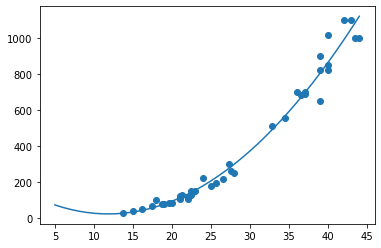

In [48]:
plt.scatter(x_train, y_train)
plt.plot(np.arange(5,45), lr.predict(new_test_poly))

In [49]:
# 다중회귀 => 더 정교한 회귀모델 (더 잘 예측..)

In [94]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [95]:
perch_full = df.to_numpy()
perch_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [96]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [97]:
# length, height, width => weight
# x : length, height, width
# y : weight

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(perch_full, perch_weight, test_size=0.3)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(x_train, y_train)

LinearRegression()

In [102]:
lr.score(x_train, y_train)

0.9404156151851646

In [103]:
lr.score(x_test, y_test)

0.9367921148308817

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)

In [107]:
train_poly.shape

(39, 9)

In [108]:
test_poly = poly.transform(x_test)

In [109]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [111]:
lr_pol = LinearRegression()
lr_pol.fit(train_poly, y_train)

LinearRegression()

In [112]:
lr_pol.score(train_poly, y_train)

0.9911327335814876

In [113]:
lr_pol.score(test_poly, y_test)

0.9495372127879094

In [ ]:
# lr_pol(다항회귀모델) train data에 비해서 test data의 R_square값이 낮다..
# => 과적합.. => 규제: 모델을 단순화.. => Ridge, Lasso, Elastic net

In [114]:
lr_pol.coef_

array([-28.99063344, -14.73064379,  76.16038297,   3.39093883,
        -6.63815377, -19.35177118, -38.43244326, 174.67102467,
       -90.5280251 ])

In [ ]:
# 회귀분석에 규제 : Lasso, Ridge

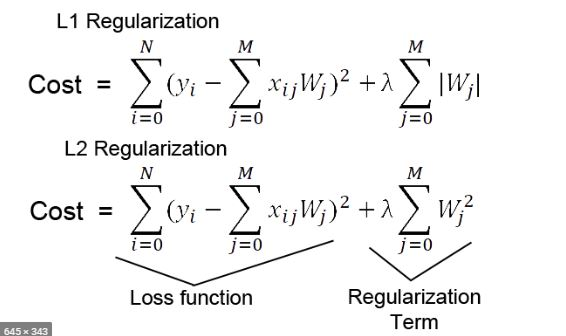

In [115]:
from IPython.display import Image
Image("L1_L2.jpg")

# cost + penalty
# penalty : 계수의 절대값 합 => Lasso
# penalty : 계수의 제곱합 합 => Ridge
# penalty : 계수의 제곱합과 절대값합을 추가 => Ridge

In [116]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_poly, y_train)

Ridge()

In [117]:
ridge.score(train_poly, y_train)

0.9900190177684843

In [118]:
ridge.score(test_poly, y_test)

0.9775814571127097

In [119]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_poly, y_train)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22777.352244343234, tolerance: 487.6311455897436
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [120]:
lasso.score(train_poly, y_train)

0.9891435681335284

In [121]:
lasso.score(test_poly, y_test)

0.9799872217687535

In [122]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(train_poly, y_train)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19671.536095077387, tolerance: 487.6311455897436
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [123]:
en.score(train_poly, y_train)

0.988951330227173

In [124]:
en.score(test_poly, y_test)

0.9797685443248576

In [127]:
train_score = []
test_score = []

alpha_list = [0.01, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_poly, y_train)
    train_score.append(ridge.score(train_poly, y_train))
    test_score.append(ridge.score(test_poly, y_test))    

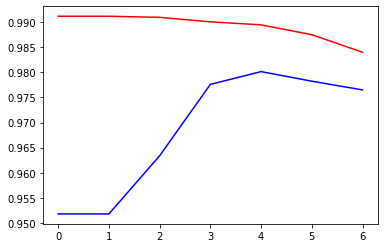

In [128]:
plt.plot(train_score, c='r')
plt.plot(test_score, c='b')